In [43]:
import numpy as np
import torch
import glob
import pickle
from scipy.spatial.distance import cosine
import seaborn as sns

In [14]:
files = sorted(glob.glob('results/result_data_e92199_000*'))
files

['results/result_data_e92199_000_000.pkl',
 'results/result_data_e92199_000_001.pkl',
 'results/result_data_e92199_000_002.pkl',
 'results/result_data_e92199_000_003.pkl',
 'results/result_data_e92199_000_004.pkl',
 'results/result_data_e92199_000_005.pkl',
 'results/result_data_e92199_000_006.pkl',
 'results/result_data_e92199_000_007.pkl',
 'results/result_data_e92199_000_008.pkl',
 'results/result_data_e92199_000_009.pkl',
 'results/result_data_e92199_000_010.pkl',
 'results/result_data_e92199_000_011.pkl',
 'results/result_data_e92199_000_012.pkl',
 'results/result_data_e92199_000_013.pkl',
 'results/result_data_e92199_000_014.pkl',
 'results/result_data_e92199_000_015.pkl',
 'results/result_data_e92199_000_016.pkl',
 'results/result_data_e92199_000_017.pkl',
 'results/result_data_e92199_000_018.pkl']

In [15]:
with open(files[0],'rb') as a:
    model_state_dict = pickle.load(a)

In [9]:
list(model_state_dict.keys())


['0.weight', '0.bias', '3.weight', '3.bias']

In [10]:
type(model_state_dict['0.weight'])


torch.Tensor

In [11]:
model_state_dict['0.weight'].shape

torch.Size([50, 784])

In [74]:
def cosine_distances(a):
    vecs = a.shape[0]
    ret = np.full((vecs,vecs),np.nan)
    for i in range(vecs):
        for j in range(vecs):
            ret[i,j] = cosine(a[i,:],a[j,:])
            
    return ret

In [69]:
def cosines_and_magnitudes(a):
    ata = a.dot(a.T)
    vec_mags = np.sqrt(np.diag(ata))
    denom = vec_mags[:,np.newaxis].dot(vec_mags[np.newaxis,:])
    cosines = 1 - ata / denom
    return cosines, vec_mags

In [19]:
a0 = model_state_dict['0.weight'].numpy()

In [75]:
cd1 = cosine_distances(a0)
cd2, mags = cosines_and_magnitudes(a0)

In [76]:
cd1.shape, cd2.shape

((50, 50), (50, 50))

In [77]:
np.mean(cd1**2), np.mean(cd2**2)

(0.9810761048517809, 0.9810762)

In [42]:
w0_cd[:3,:3]

array([[0.        , 0.97564746, 1.04742898],
       [0.97564746, 0.        , 1.06969699],
       [1.04742898, 1.06969699, 0.        ]])

In [36]:
np.nanargmax(w0_cd),np.nanmax(w0_cd)

(975, 1.1228803545236588)

In [33]:
w0_cd.shape


(50, 50)

In [34]:
975/50

19.5

In [35]:
w0_cd[19,25]

1.1228803545236588

In [38]:
np.dot(a0[19],a0[25]), np.dot(a0[19],a0[19]), np.dot(a0[25],a0[25])

(-0.04077228, 0.33273777, 0.33087426)

In [57]:
def fc_layer_stats(a):
    cd = cosine_distances(a)
    mins = np.nanmin(cd,axis=0)
    mags = 
    return mins
    sns.kdeplot(mins)

In [58]:
ms = fc_layer_stats(a0)

In [59]:
ms.shape

(50,)

In [60]:
ms

array([0.92354789, 0.92237563, 0.91776218, 0.94502495, 0.92999601,
       0.92136713, 0.92269529, 0.94022095, 0.91581519, 0.9480301 ,
       0.93141365, 0.93429696, 0.91398586, 0.9256597 , 0.91001678,
       0.9398489 , 0.94693592, 0.88011195, 0.91343768, 0.90477876,
       0.92081515, 0.85823467, 0.93937659, 0.91808303, 0.85823467,
       0.94339843, 0.93435413, 0.89105272, 0.93562941, 0.89105272,
       0.92651498, 0.90637997, 0.94195479, 0.92237563, 0.91165648,
       0.90479688, 0.94317385, 0.88011195, 0.92999601, 0.90871148,
       0.94317385, 0.93952371, 0.9104142 , 0.90871148, 0.9256597 ,
       0.91398586, 0.91709655, 0.92591085, 0.9131918 , 0.91581519])

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


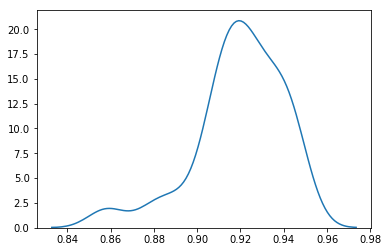

In [61]:
sns.kdeplot(ms)

In [65]:
np.diag(w0_cd)[:,np.newaxis].shape

(50, 1)